# Cholamandalam - In Progress

In [1]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/nbfc/cholamandalam/cholamandalam.csv')

In [3]:
# Know the shape of the loaded data
df.shape

(2603, 27)

## Preprocessing

In [4]:
processor = Processor('./../../data/config.json')

In [5]:
# Preprocess the data
pre_df, post_df = processor.preprocess(df)

In [6]:
# Create dictionaries
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [7]:
# Create corpus
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [8]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [9]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.070*"investment" + 0.014*"crore" + 0.012*"india" + 0.009*"cr" + '
  '0.008*"week" + 0.007*"cholafin" + 0.007*"result" + 0.006*"net_profit" + '
  '0.006*"yoy" + 0.006*"accumulate"'),
 (1,
  '0.016*"fin" + 0.013*"investment" + 0.011*"th" + 0.009*"investment_company" '
  '+ 0.009*"profit" + 0.009*"holding" + 0.008*"profit_increased" + '
  '0.008*"services" + 0.008*"decreased" + 0.008*"news"'),
 (2,
  '0.022*"vs" + 0.009*"good" + 0.009*"reliance_nippon" + 0.009*"insurance" + '
  '0.009*"strong" + 0.008*"rupees" + 0.007*"years_view" + 0.007*"want_buy" + '
  '0.007*"ms_general" + 0.006*"qoq"'),
 (3,
  '0.013*"investment_company" + 0.011*"india" + 0.008*"investment" + '
  '0.008*"branch" + 0.007*"crores" + 0.007*"chart" + 0.007*"portfolio" + '
  '0.007*"today" + 0.007*"decreased" + 0.006*"april"'),
 (4,
  '0.018*"moodys" + 0.012*"loan" + 0.009*"series" + 0.008*"india" + '
  '0.008*"action" + 0.007*"art" + 0.007*"abs" + 0.007*"trust" + '
  '0.007*"assigns" + 0.007*"platinum"'),
 (5,


In [10]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [11]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.014*"investment_company" + 0.010*"buy_pay" + 0.009*"dividend" + '
  '0.009*"loan" + 0.009*"maruti_suzuki" + 0.008*"news" + '
  '0.007*"financial_holdings" + 0.007*"bank" + 0.007*"feb" + '
  '0.007*"investment"'),
 (1,
  '0.028*"investment" + 0.020*"crore" + 0.019*"bond" + 0.017*"raise_funds" + '
  '0.016*"fin" + 0.013*"cr" + 0.012*"cp_coupon" + 0.010*"results" + '
  '0.009*"takes_rs" + 0.009*"cr_yr"'),
 (2,
  '0.023*"investment" + 0.019*"company" + 0.015*"price" + '
  '0.015*"investment_company" + 0.010*"financial_holdings" + '
  '0.008*"forecast_earnings" + 0.008*"fin_ltds" + 0.007*"pe" + '
  '0.007*"earnings" + 0.006*"moved_week"'),
 (3,
  '0.014*"investment" + 0.012*"thank" + 0.011*"buy" + 0.011*"bank" + '
  '0.010*"target_securities" + 0.010*"mobile_number" + 0.009*"nbfc" + '
  '0.009*"customer_send" + 0.009*"team_touch" + 0.009*"number_fhl"'),
 (4,
  '0.037*"investment" + 0.017*"buy" + 0.014*"target" + 0.013*"fin" + '
  '0.013*"stocks" + 0.008*"financial" + 0.007*"bank" 

### Evaluation

In [12]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -13.455114790682023


In [13]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -13.254450321360617


## Hyper-parameter tuning

### Pre-COVID

In [14]:
pre_df_result = processor.perform_hyperparameter_tuning(pre_corpus, 
                                                        pre_id2word, 
                                                        pre_df['bigram'].values.tolist(), 
                                                        "./../../data/nbfc/cholamandalam/pre.csv")

100%|██████████| 780/780 [49:42<00:00,  3.82s/it]


In [15]:
# pre_df_result = pd.read_csv("./../../data/nbfc/cholamandalam/pre.csv")

In [16]:
# Maximum coherence
pre_df_result.sort_values('Coherence', ascending=False, inplace=True)
pre_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
597,100% Corpus,8,asymmetric,0.61,-9.929891
406,100% Corpus,2,0.9099999999999999,0.31,-10.219250
17,75.0% Corpus,2,0.9099999999999999,0.61,-10.361176
657,100% Corpus,10,asymmetric,0.61,-10.368994
598,100% Corpus,8,asymmetric,0.9099999999999999,-10.378691
411,100% Corpus,2,symmetric,0.31,-10.403206
404,100% Corpus,2,0.61,symmetric,-10.409104
412,100% Corpus,2,symmetric,0.61,-10.411920
23,75.0% Corpus,2,symmetric,0.9099999999999999,-10.417708
628,100% Corpus,9,asymmetric,0.9099999999999999,-10.427334


In [17]:
pre_ts_df = processor.create_topic_df(pre_df_result[pre_df_result['Validation_Set'] == '100% Corpus'], 
                                        '0.9099999999999999',
                                        '0.9099999999999999')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

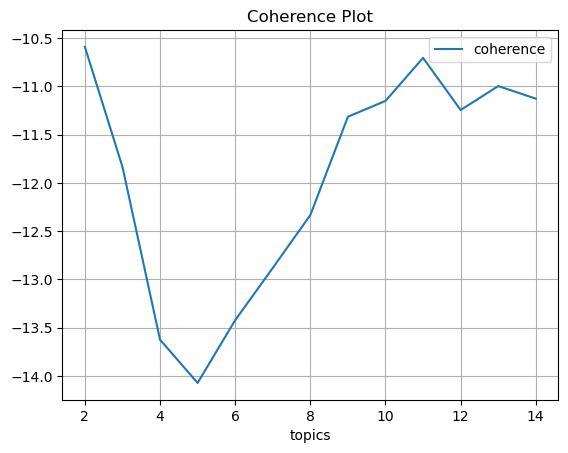

In [18]:
pre_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [19]:
fig = px.line(pre_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For pre-COVID period, there are two points 10 and 3 where are coherence score is close to 0. But for the initial analysis, 3 will be chosen.

In [20]:
pre_df_result[pre_df_result['Topics'] == 3].head(5)

,Validation_Set,Topics,Alpha,Beta,Coherence
423,100% Corpus,3,0.01,0.9099999999999999,-11.354870
34,75.0% Corpus,3,0.01,symmetric,-11.379415
437,100% Corpus,3,0.9099999999999999,0.61,-11.385885
439,100% Corpus,3,0.9099999999999999,symmetric,-11.431754
446,100% Corpus,3,asymmetric,0.31,-11.489945


### Post-COVID

In [21]:
post_df_result = processor.perform_hyperparameter_tuning(post_corpus, 
                                                        post_id2word, 
                                                        post_df['bigram'].values.tolist(), 
                                                        "./../../data/nbfc/cholamandalam/post.csv")

100%|██████████| 780/780 [55:25<00:00,  4.26s/it] 


In [22]:
# post_df_result = pd.read_csv("./../../data/nbfc/cholamandalam/post.csv")

In [23]:
# Maximum coherence
post_df_result.sort_values('Coherence', ascending=False, inplace=True)
post_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
238,75.0% Corpus,9,asymmetric,0.9099999999999999,-8.640959
388,75.0% Corpus,14,asymmetric,0.9099999999999999,-9.266735
448,100% Corpus,3,asymmetric,0.9099999999999999,-9.543640
298,75.0% Corpus,11,asymmetric,0.9099999999999999,-9.575640
387,75.0% Corpus,14,asymmetric,0.61,-9.878201
283,75.0% Corpus,11,0.61,0.9099999999999999,-10.021424
417,100% Corpus,2,asymmetric,0.61,-10.069565
768,100% Corpus,14,0.9099999999999999,0.9099999999999999,-10.341982
297,75.0% Corpus,11,asymmetric,0.61,-10.350380
58,75.0% Corpus,3,asymmetric,0.9099999999999999,-10.408679


In [24]:
post_ts_df = processor.create_topic_df(post_df_result[post_df_result['Validation_Set'] == '100% Corpus'], 
                                        'symmetric',
                                        '0.61')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

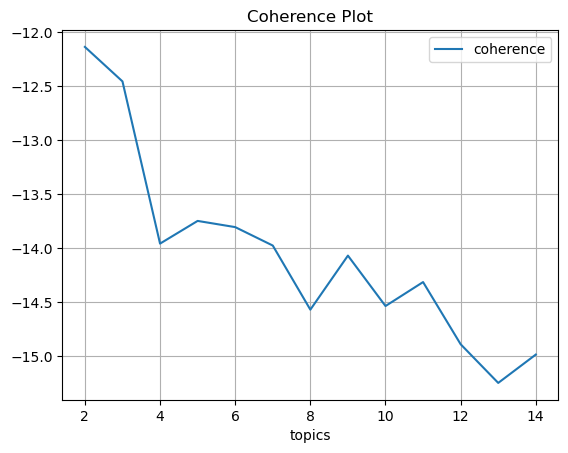

In [25]:
post_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [26]:
fig = px.line(post_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For the post-COVID period, the model with a number of topics equal to 2 gives the best coherence score.

In [27]:
post_df_result[(post_df_result['Topics'] == 2)].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
417,100% Corpus,2,asymmetric,0.61,-10.069565
418,100% Corpus,2,asymmetric,0.9099999999999999,-11.486385
419,100% Corpus,2,asymmetric,symmetric,-11.844203
402,100% Corpus,2,0.61,0.61,-11.923868
409,100% Corpus,2,0.9099999999999999,symmetric,-11.932966


## Final Models

### Pre-COVID

In [28]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=3,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=0.91,
                                        eta=0.91)

In [29]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -9.05182712803623


### Post-COVID

In [30]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='symmetric',
                                        eta=0.61)

In [31]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_final_coherence_lda)

Post-COVID Coherence Score:  -4.038979494981495


## Inferencing

### Pre-COVID

In [32]:
pre_df_topic_sents_keywords = processor.dominant_topics(ldamodel=pre_final_lda_model, 
                                                         corpus=pre_corpus, 
                                                         texts=pre_df['bigram'].values.tolist(),
                                                         tweets=pre_df['tweet'].values.tolist())

In [33]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.8346,"thank, hello, team, contact_details, experienc...",@seemants @HarshLunia @anandlunia Hello Seeman...
1,0,0.7260,"thank, hello, team, contact_details, experienc...",@anandlunia Sir Got your message .. will reque...
2,2,0.6503,"working_capital, help_small, indias_raises, bu...",@Lendingkart profitable Indian B2B SME with 16...
3,2,0.8319,"working_capital, help_small, indias_raises, bu...",@ftfinancenews @YahooFinance @FinMinIndia @Jag...
4,1,0.8478,"india, crore, heres, new, alteria_capital, sta...",Lendingkart has appointed Ratul Paul as Senior...
...,...,...,...,...
1257,0,0.8456,"thank, hello, team, contact_details, experienc...","@avinash_9898 Hi Avinash, Hope our representat..."
1258,1,0.5887,"india, crore, heres, new, alteria_capital, sta...","On-Campus Placement drive ""Lendingkart "" at Na..."
1259,0,0.8395,"thank, hello, team, contact_details, experienc...","@avinash_9898 Hi Avinash, We regret the inconv..."
1260,0,0.8903,"thank, hello, team, contact_details, experienc...",@Lendingkart Just wish to let you guys know th...


In [34]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['thank, hello, team, contact_details, experience, business, customer, number, carecom, request',
       'working_capital, help_small, indias_raises, businesses_access, loan, business, company, business_loan, heres, documents',
       'india, crore, heres, new, alteria_capital, startups, business, raised, fintech, companies'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Customer Experience
   - Key terms: 'thank, hello, team, contact_details, experience, business, customer, number, carecom, request'

2. Topic Number: 1
   - Probable topic title: Enabling Businesses
   - Key terms: 'working_capital, help_small, indias_raises, businesses_access, loan, business, company, business_loan, heres, documents'

3. Topic Number: 2
   - Probable topic title: Fund Raising
   - Key terms: 'india, crore, heres, new, alteria_capital, startups, business, raised, fintech, companies'

In [35]:
pre_dist, fig = processor.plot_topic_distribution(pre_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '477'), Text(0, 0, '427'), Text(0, 0, '358')]

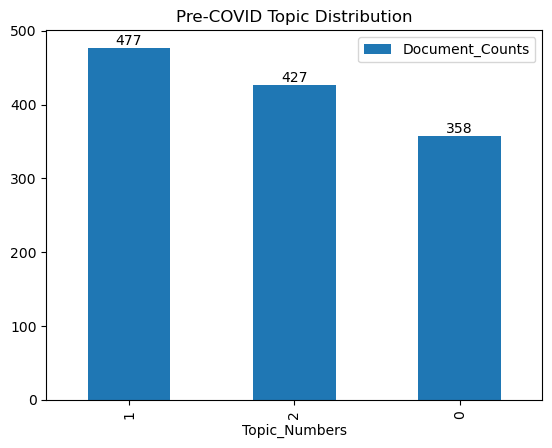

In [36]:
ax = pre_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Pre-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

All the topics have almost equal distribution. This can be one of the signals that the company is conscious of its social media presence.

### Post-COVID

In [37]:
post_df_topic_sents_keywords = processor.dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist(), tweets=post_df['tweet'].values.tolist()
)

In [38]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.9779,"emi, loan, moratorium, company, customer, mail...",@nsitharaman @RBI @Lendingkart My loan Id LAI-...
1,0,0.9779,"emi, loan, moratorium, company, customer, mail...",@RBI @Lendingkart @FinMinIndia My loan Id LAI-...
2,0,0.9481,"emi, loan, moratorium, company, customer, mail...",@Lendingkart I have not recvd any thing from y...
3,0,0.9143,"emi, loan, moratorium, company, customer, mail...",@Lendingkart dear I was asking for restructuri...
4,1,0.9614,"contact, customer_experience, serve, kindly_dm...","@AKHILESHU07 Hello, Kindly DM us or share your..."
...,...,...,...,...
3016,0,0.9710,"emi, loan, moratorium, company, customer, mail...","For us to function as efficiently as we do, it..."
3017,0,0.9700,"emi, loan, moratorium, company, customer, mail...","🔊 Speaker Alert: Join Mithun Sundar, CEO of @L..."
3018,0,0.9724,"emi, loan, moratorium, company, customer, mail...","The Union #Budget 2020-21 has earmarked Rs 7,5..."
3019,0,0.9852,"emi, loan, moratorium, company, customer, mail...",Help Me Please\nMai @BhavendraCom @Lkartindia ...


In [39]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['emi, loan, moratorium, company, customer, mail, request, time, rbi, business',
       'contact, customer_experience, serve, kindly_dm, share_registered, officer_shall, looking_forward, solve_concern, happy_contact, thank'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Loan Processing Issues and Queries
   - Key terms: 'emi, loan, moratorium, company, customer, mail, request, time, rbi, business'

<br>

2. Topic Number: 1
   - Probable topic title: Issue resolutions by company
   - Key terms: 'contact, customer_experience, serve, kindly_dm, share_registered, officer_shall, looking_forward, solve_concern, happy_contact, thank'

In [40]:
post_dist, fig = processor.plot_topic_distribution(post_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '1855'), Text(0, 0, '1166')]

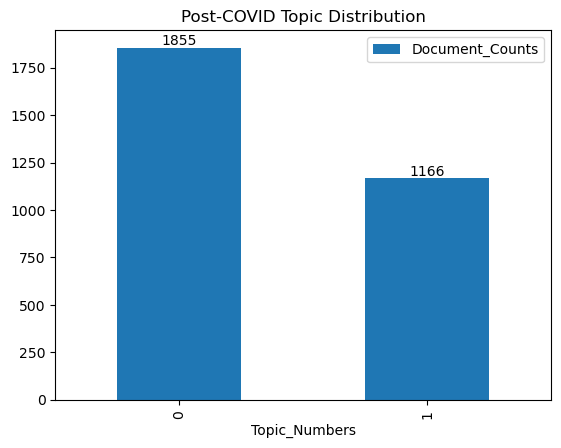

In [41]:
ax = post_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Post-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

More and more people are trying to communicate with the company through Twitter.

In [43]:
# Save outputs
pre_df_topic_sents_keywords.to_csv('./../../data/nbfc/cholamandalam/cholamandalam_pre_output.csv', index=True)
post_df_topic_sents_keywords.to_csv('./../../data/nbfc/cholamandalam/cholamandalam_post_output.csv', index=True)